# MNIST Tensor flow example
E. Krupczak - 18 Aug 2018

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Import mnist data, which comes with tensor flow
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Components of MNIST
- mnist.train
- mnist.test
- mnist.validation
Each with images and labels

In [4]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [5]:
mnist.train.labels.shape

(55000, 10)

In [20]:
#This is a six
mnist.train.labels[600]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

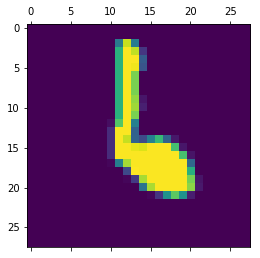

In [19]:
#this is the first image
plt.matshow(mnist.train.images[600].reshape((28,-1)))

In [24]:
# Function to make weight and bias variables
# Number of weight variables: 784*number of nodes in next layer
# Number of bias (i.e. offset/intercept) variables: number of nodes in next layer

def weight_variable(shape):
    '''For matrix multiplication in fully-connected layers, weight variable shape is: input size * output size.'''
    #Normally distributed variables clamped between 0-1 with stddev as given
    initial = tf.truncated_normal(shape, stddev=0.1)
    #Return variable node
    return tf.Variable(initial)

def bias_variable(shape):
    ''' Bias variable shape is number of loads in next layer. '''
    #Slightly positive so we preserve more gradients for RELU non-linearity 
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

In [85]:
#input placeholder - 28x28 represented as a 784-length vector
input_ph = tf.placeholder(tf.float32, shape=[None,28*28], name = 'input_ph')
#output placeholder - a 10-length vector containing logits
output_ph = tf.placeholder(tf.float32, shape=[None,10], name = 'output_ph')

#flow stores current node as we process through the layers
#Starts by pointing to placeholder node for input
flow = input_ph

#Make some layers
def make_layer(n):
    global flow
    #Use the shape of the previous layer to make the weight variable for the next
    w1 = weight_variable((int(flow.shape[-1]), n))
    b1 = bias_variable((n,))
    #right-multiply by the weight
    #flow points to computational node
    flow = tf.matmul(flow,w1)+b1
    
def make_nonlinearity():
    '''rectified linear'''
    global flow
    #updates computational node held by flow
    flow = tf.nn.relu(flow)
    
#Intersperse nonlinearity between the affine layers
#Layer 1 - 100 nodes
make_layer(100)
make_nonlinearity()
#Layer 2 - 50 nodes
make_layer(50)
make_nonlinearity()
#Layer 3 (output) - 10 nodes
make_layer(10)

network_output = flow

#Make loss computational node (returns loss as a number)
##Simplest loss function (squared error)
#loss = tf.reduce_mean((output_ph - network_output)**2)
##Cross-entropy loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=output_ph, 
    logits=network_output, #unnormalized log probabilities of label classes
))

#Gradient descent with 'GradientDescentOptimizer'
learning_rate = 0.1
#make training step computational node (has only side effects; returns none)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#Make a new session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [86]:
loss_list = []

Loss at step 0 : 0.9005655
Loss at step 1 : 0.88343436
Loss at step 2 : 0.8670623
Loss at step 3 : 0.85141385
Loss at step 4 : 0.83644915
Loss at step 5 : 0.8221308
Loss at step 6 : 0.8084315
Loss at step 7 : 0.79531485
Loss at step 8 : 0.7827509
Loss at step 9 : 0.7707123
Loss at step 10 : 0.7591682
Loss at step 11 : 0.748097
Loss at step 12 : 0.73747385
Loss at step 13 : 0.727271
Loss at step 14 : 0.7174693
Loss at step 15 : 0.7080496
Loss at step 16 : 0.6989946
Loss at step 17 : 0.6902817
Loss at step 18 : 0.68189716
Loss at step 19 : 0.67382413


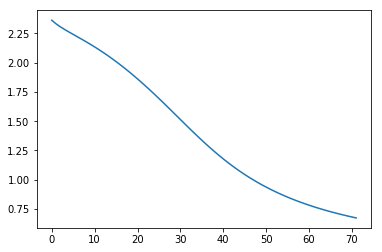

In [104]:
feed_dict={
    input_ph: mnist.train.images,
    output_ph: mnist.train.labels,
}

for i in range(20):
    newloss = sess.run(loss, feed_dict=feed_dict)
    loss_list.append(newloss)
    sess.run(train_step, feed_dict=feed_dict)
    print('Loss at step', len(loss_list), ':', newloss)
plt.plot(loss_list)

In [111]:
model_output = sess.run(network_output, feed_dict={
    input_ph:mnist.test.images[0:10],
})

In [112]:
model_output[0]

array([-1.1054289 , -1.8227937 , -1.3141638 , -0.4824272 ,  0.01756541,
       -0.6484673 , -4.298918  ,  5.436556  , -0.13939157,  2.5360048 ],
      dtype=float32)

In [113]:
def softmax(x):
    x = np.exp(x)
    return x/x.sum()

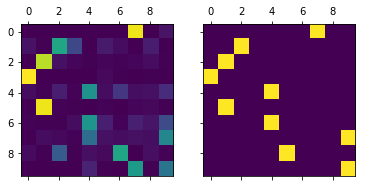

In [115]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.matshow([softmax(x) for x in model_output])
ax2.matshow(mnist.test.labels[0:10])

In [103]:
len(loss_list)

52

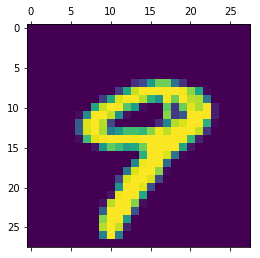

In [117]:
plt.matshow(mnist.test.images[9].reshape((28,28)))